In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Data Collection and preprocessing


In [60]:
# loading data to pandas dataframe
train_data= pd.read_csv('C:\\Users\\nehaj\\Desktop\\krishna\\projects\\loan_status_prediction\\data\\train.csv')
test_data = pd.read_csv('C:\\Users\\nehaj\\Desktop\\krishna\\projects\\loan_status_prediction\\data\\test.csv')


In [61]:
type(train_data)
type(test_data)

pandas.core.frame.DataFrame

In [62]:
#first five rows of train dataset
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
#first five rows of test dataset
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
#number of rows and columns in training dataset
train_data.shape


(614, 13)

In [65]:
#number of rows and columns in test data
test_data.shape

(367, 12)

In [66]:
#statistical data measurement 
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
#number of missing values in each columm
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [71]:
# concating train and test data for preprocessing
data = pd.concat([train_data, test_data])

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:

data.shape

(981, 13)

In [74]:
#dropping the unwanted column
data.drop('Loan_ID', inplace = True, axis = 'columns')

In [75]:
#dependents column values
data['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [76]:
#replacing the value of 3+ to 4
data=data.replace(to_replace='3+',value=4)


In [77]:
#dependents value
data['Dependents'].value_counts()

0    545
1    160
2    160
4     91
Name: Dependents, dtype: int64

In [78]:
#identify the missing values
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [79]:
#checking the highest frequency
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [80]:
data['Gender'].groupby(data['Gender']).count()

Gender
Female    182
Male      775
Name: Gender, dtype: int64

In [81]:
#Frequent category Imputation for missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [82]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [83]:
# using iterative imputer to for filling the missing values of loanamount and loan amount term
data1= data.loc[:,['LoanAmount', 'Loan_Amount_Term']]
from sklearn.ensemble import RandomForestRegressor
#Running the imputer with random forest estimator
imp = IterativeImputer(RandomForestRegressor(),max_iter=1000, random_state=0)
data1=pd.DataFrame(imp.fit_transform(data1),columns=data1.columns)

data['LoanAmount']= data1['LoanAmount']
data['Loan_Amount_Term']= data1['Loan_Amount_Term']

c:\Users\nehaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [84]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [85]:
# convert the cargorical variables with integers as the model does not accept any string values
data.replace({'Gender':{'Male':0,'Female':1 },'Married':{'No':0,'Yes':1 },'Education':{'Not Graduate':0,'Graduate':1 },'Self_Employed':{'No':0,'Yes':1 },'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2 }},inplace=True) 


In [86]:
#creating new feature
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(['ApplicantIncome','CoapplicantIncome'], axis='columns',inplace=True)

In [87]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,144.489832,360.0,1.0,2,Y,5849.0
1,0,1,1,1,0,128.000000,360.0,1.0,0,N,6091.0
2,0,1,0,1,1,66.000000,360.0,1.0,2,Y,3000.0
3,0,1,0,0,0,120.000000,360.0,1.0,2,Y,4941.0
4,0,0,0,1,0,141.000000,360.0,1.0,2,Y,6000.0


# Data Visualization

In [88]:
new_traindata= data.iloc[:614]
new_testdata= data.iloc[614:]

In [89]:
#converting N to 0 and Y to 1 in loan status 
new_traindata.replace({'Loan_status':{'N':0,'Y':1}},inplace= True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

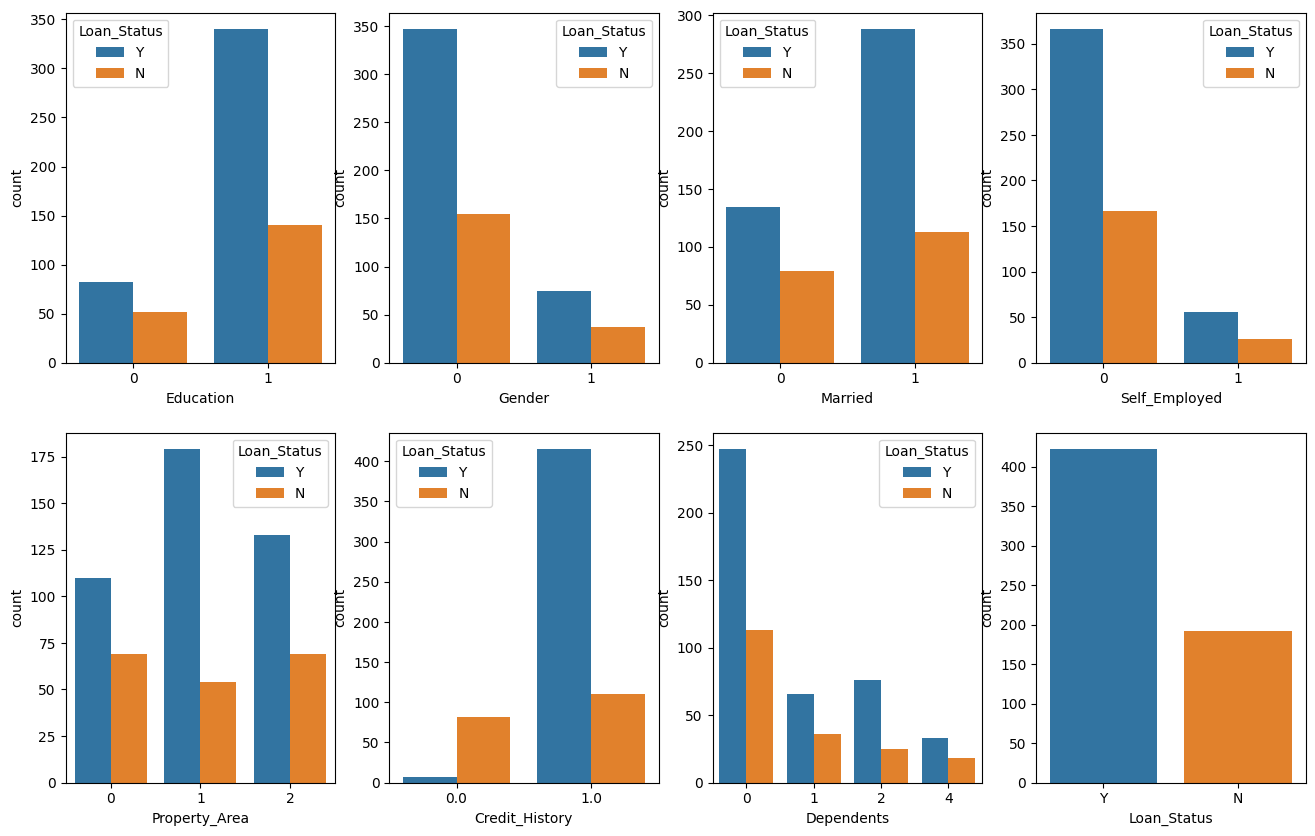

In [90]:

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Education',hue='Loan_Status',data=new_traindata, ax=ax[0][0])
sns.countplot(x='Gender',hue='Loan_Status',data=new_traindata, ax=ax[0][1])
sns.countplot(x='Married',hue='Loan_Status',data=new_traindata, ax=ax[0][2])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=new_traindata, ax=ax[0][3])
sns.countplot(x='Property_Area',hue='Loan_Status',data=new_traindata, ax=ax[1][0])
sns.countplot(x='Credit_History',hue='Loan_Status',data=new_traindata, ax=ax[1][1])
sns.countplot(x='Dependents',hue='Loan_Status',data=new_traindata, ax=ax[1][2])
sns.countplot(x='Loan_Status',data=new_traindata, ax=ax[1][3])

 Analysis:
 1. Count of graduate applicant is more than non graduate and loan approval are more for graduate people. 
 2. Count of male applicants is more than female applicants and loan approval for male applicants is more.
 3. Count of married applicant is more than nonmarried and loan approval for married is also higher.
 4. Count for self employed is less than non self employed and loan approval for non self employed is higher.
 5. Maximum properties are located in semiurban areas .
 6. Most of the applicants have credit history and loan is mostly approved for those who have credit history.
 7. Count of applicants who have zero dependents is maximum.
 8. More loan are approved than rejected.

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

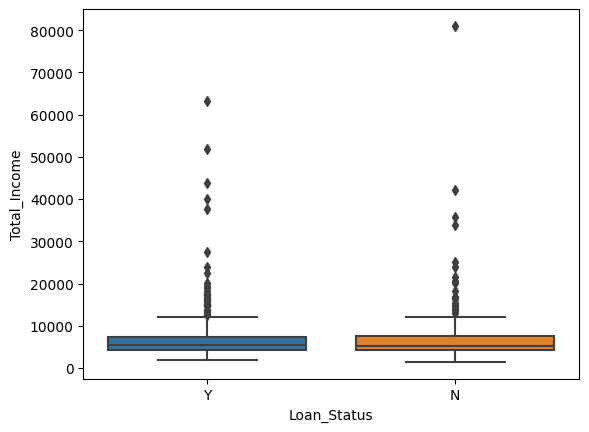

In [91]:
sns.boxplot(x='Loan_Status',y='Total_Income',data=new_traindata)

Mean total income for loan approved and loan not approved is almost same. 

# Building Machine Learning Model

In [92]:
# Creatin x (input variable) and y (target variable) from new train data
X = new_traindata.drop('Loan_Status', axis='columns')
Y = new_traindata['Loan_Status']

In [93]:
print(X)



     Gender  Married Dependents  Education  Self_Employed  LoanAmount  \
0         0        0          0          1              0  144.489832   
1         0        1          1          1              0  128.000000   
2         0        1          0          1              1   66.000000   
3         0        1          0          0              0  120.000000   
4         0        0          0          1              0  141.000000   
..      ...      ...        ...        ...            ...         ...   
609       1        0          0          1              0   71.000000   
610       0        1          4          1              0   40.000000   
611       0        1          1          1              0  253.000000   
612       0        1          2          1              0  187.000000   
613       1        0          0          1              1  133.000000   

     Loan_Amount_Term  Credit_History  Property_Area  Total_Income  
0               360.0             1.0              2  

In [94]:
print(Y)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [129]:
# train test split on new train data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=3)

In [130]:
print(X.shape,X_train.shape,X_test.shape)

(614, 10) (552, 10) (62, 10)


Support Vector Machine Model

In [131]:
classifier = svm.SVC(kernel='linear')


In [132]:
#training the svm model
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

Model Evaluation

In [133]:
#accuracy on training data 
X_train_prediction= classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [134]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7717391304347826


In [135]:
#accuracy on test data
X_test_prediction= classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [136]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8548387096774194


Logistic Regression Model


In [137]:
from sklearn.linear_model import LogisticRegression


LR= LogisticRegression(max_iter= 1000)
LR.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

Evaluation

In [138]:
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [139]:
print('Training data accuracy is :', training_data_accuracy)

Training data accuracy is : 0.8007246376811594


In [140]:
X_test_prediction = LR.predict(X_test)
training_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [141]:
print('Test data accuracy is :', test_data_accuracy)

Test data accuracy is : 0.8548387096774194


In [142]:
new_testdata.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,1,0,144.489832,360.0,1.0,2,NaN,5720.0
1,0,1,1,1,0,128.000000,360.0,1.0,2,NaN,4576.0
2,0,1,2,1,0,66.000000,360.0,1.0,2,NaN,6800.0
3,0,1,2,1,0,120.000000,360.0,1.0,2,NaN,4886.0
4,0,0,0,0,0,141.000000,360.0,1.0,2,NaN,3276.0


In [143]:
testd = new_testdata.drop('Loan_Status', axis='columns')

In [144]:
testd.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,1,0,1,0,144.489832,360.0,1.0,2,5720.0
1,0,1,1,1,0,128.000000,360.0,1.0,2,4576.0
2,0,1,2,1,0,66.000000,360.0,1.0,2,6800.0
3,0,1,2,1,0,120.000000,360.0,1.0,2,4886.0
4,0,0,0,0,0,141.000000,360.0,1.0,2,3276.0


In [128]:
#predicting using model
input_data =(0,1,0,1,0,144.073601,360.0,1.0,2,5720.0)


# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Prediction using logistic regression model
print("logistic Regression Model")
prediction = LR.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Not Elligible')
else:
  print('Elligible')

# Prediction using SVM model
print("SVM Model")
prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Not Elligible')
else:
  print('Elligible')

logistic Regression Model
['Y']
Elligible
SVM Model
['Y']
Elligible


c:\Users\nehaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\nehaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
